Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


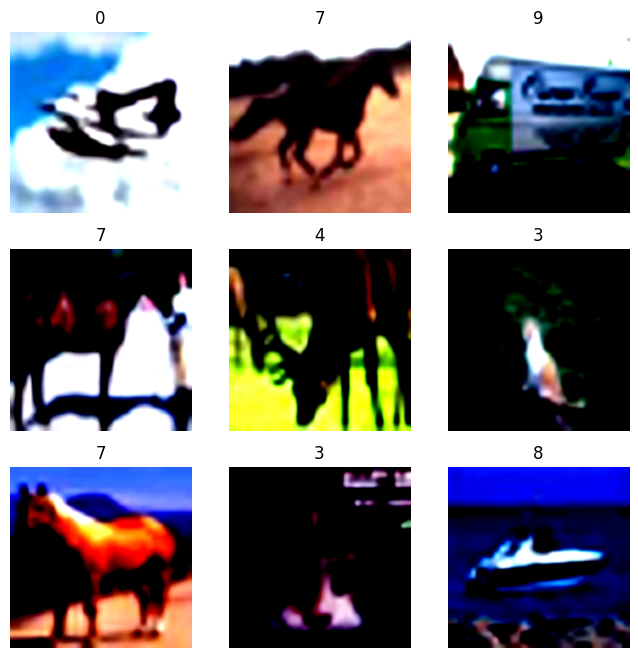

In [32]:
import torch
from fomo.models.clip.clip_base import ClipBase
from fomo.utils.data.datasets import CIFAR10
import matplotlib.pyplot as plt

clip = ClipBase()

cifar10 = CIFAR10(train=True, transforms=clip.transforms)

train_dataset = cifar10.dataset

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0))
plt.show()

The goal is to create a new dataset, with image embeddings and labels.
The order of the image embeddings will correspond to the order of images in the original dataset.

For the labels, we will also store mappings to their text embeddings.

In [43]:
from torch.utils.data import DataLoader
from tqdm import tqdm

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=False)

img_embeddings = []
labels = []

for i, batch in enumerate(tqdm(train_dataloader)):
    img_tensor, labels_in_batch = batch

    image_embeddings = clip.encode_images(img_tensor)

    img_embeddings.append(
        image_embeddings.squeeze(0).detach().cpu().numpy()
    )
    labels.append(labels_in_batch)

    if i == 1:
        break

# Store embeddings and labels to csv
import numpy as np
import pandas as pd

img_embeddings = np.array(img_embeddings)
labels = np.array(labels)

df = pd.DataFrame(img_embeddings)
df["label"] = labels
df.to_csv("data/cifar10_embeddings.csv", index=False)

  0%|          | 1/50000 [00:28<396:07:20, 28.52s/it]


'/Users/serghei/code/uva-ai-msc/fomo/fomo/notebooks'